# Lista 2

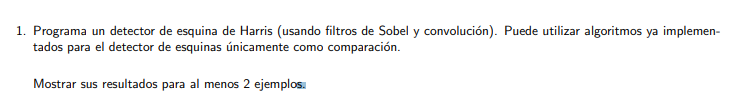

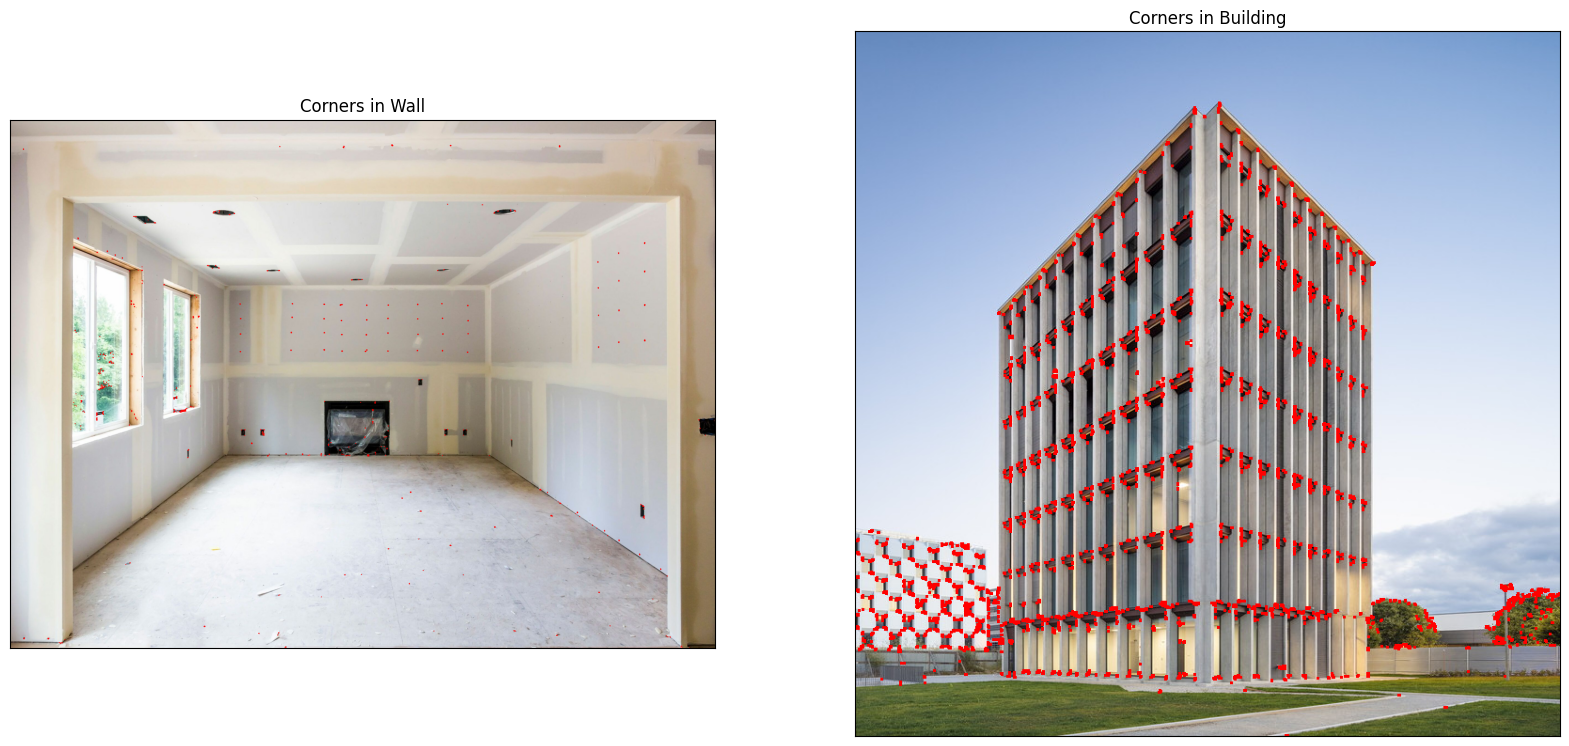

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to perform Harris corner detection
def harris_corner_detection(image_path, block_size, ksize, k):
    # Load image
    img = cv2.imread(image_path)
    # Convert img to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Convert to float32
    gray_img = np.float32(gray_img)
    # Harris corner detection
    dst = cv2.cornerHarris(gray_img, block_size, ksize, k)
    # Result is dilated for marking the corners
    dst = cv2.dilate(dst, None)
    # Threshold for an optimal value, it may vary depending on the image
    img[dst > 0.01 * dst.max()] = [0, 0, 255]
    return img

# Function to display images
def display_images(images, titles):
    plt.figure(figsize=(20, 10))
    for i, (image, title) in enumerate(zip(images, titles), 1):
        plt.subplot(1, len(images), i)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.xticks([]), plt.yticks([])
    plt.show()

# Apply Harris corner detection on both images
wall_corners = harris_corner_detection('./wall.jpg', 2, 3, 0.04)
building_corners = harris_corner_detection('./building.jpg', 2, 3, 0.04)

# Display the results
display_images([wall_corners, building_corners], ['Corners in Wall', 'Corners in Building'])
